# **Kelompok Blackbear**
**MDDP 2**

Muhammad Fikri Juan Ramadhan

Rafi Muhammad Shidqi

Alfitra Rezki Amhar

Muhammad Al Ardlika Prihasiswana

*

Data yang digunakan adalah data public yang disediakan oleh kaggle.com


DATA : https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

.

## klasifikasi penyakit jantung menggunakan klasifikasi KNN

Klasifikasi K-NN bekerja dengan mengklasifikasikan suatu objek yang mempunyai kemiripan
dengan objek lainnya. Langkah awal pada klasifikasi K-NN adalah mencari nilai parameter k, kemudian
menetukan model perhitungan jarak setelah menentukan dan menghitung jarak urutkan hasil
perhitungan jarak tersebut sehingga mendapatkan hasil klasifikasi menggunakan K-NN.

.

### Teori mengenai penerapan KNN 

(sklearn.neighbors.KNeighborsClassifier):

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [2]:
from pandas.io.pytables import Selection
#Import libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

<ipython-input-2-8cdb1913f0ce>:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


**Data Preprocessing**

In [7]:
df1 = pd.read_csv('heart_cleveland_upload.csv')
df1.shape

(297, 14)

In [8]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
! pip install pandas-profiling

In [ ]:
! pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [10]:
profile = ProfileReport(df1, title="Pandas Profiling Report")

In [13]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [14]:
#melihat value apakah ada yang missing
df1.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [15]:
df1.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

**VISUALISASI DATA**

[29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77]


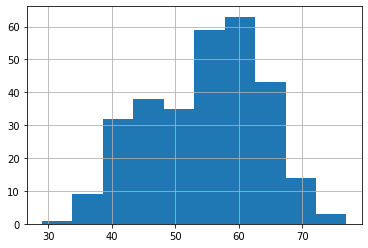

In [16]:
print(sorted(df1['age'].unique()))
df1['age'].hist()

In [17]:
## 1 = laki-laki; 0 = perempuan
# print(sorted(df1['sex'].unique)))
#df1['sex'].hist()

In [18]:
## cp: chest poin type => 1=typical angina, 2=atypical angina, 3=non-anginal pain, 4=asymptomatic
# print(sorted(df1['cp'].unique()))
# df1['cp'].hist()

[94, 100, 101, 102, 104, 105, 106, 108, 110, 112, 114, 115, 117, 118, 120, 122, 123, 124, 125, 126, 128, 129, 130, 132, 134, 135, 136, 138, 140, 142, 144, 145, 146, 148, 150, 152, 154, 155, 156, 158, 160, 164, 165, 170, 172, 174, 178, 180, 192, 200]


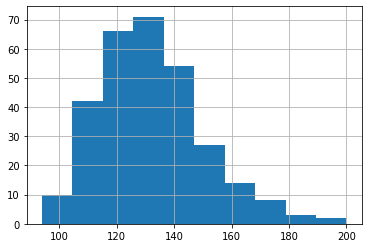

In [19]:
## trestbps: resting blood pressure / Tekanan darah
print(sorted(df1['trestbps'].unique()))
df1['trestbps'].hist()

[126, 131, 141, 149, 157, 160, 164, 166, 167, 168, 169, 172, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 188, 192, 193, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 278, 281, 282, 283, 284, 286, 288, 289, 290, 293, 294, 295, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 311, 313, 315, 318, 319, 321, 322, 325, 326, 327, 330, 335, 340, 341, 342, 353, 354, 360, 394, 407, 409, 417, 564]


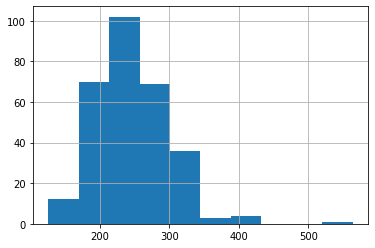

In [20]:
## chol : cholestoral / Kolestrol
print(sorted(df1['chol'].unique()))
df1['chol'].hist()

In [21]:
# fbs : fasting blood sugar / Gula darah > 120 ==> 1=true, 0=false
# print(sorted(df1['fbs'].unique()))
# df1['fbs'].hist()

In [22]:
# restecg : resting electrocardiograpic result / Hasil elektrokardiografi
# print(sorted(df1['restecg'].unique()))
# df1['restecg'].hist()

[71, 88, 90, 95, 96, 97, 99, 103, 105, 106, 108, 109, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188, 190, 192, 194, 195, 202]


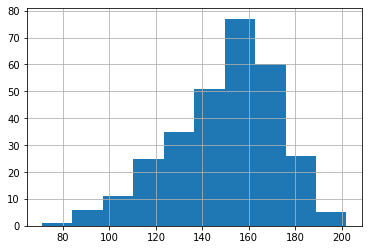

In [23]:
# thalach : maximum heart rate achieved / Detak jantung maksimum
print(sorted(df1['thalach'].unique()))
df1['thalach'].hist()

In [24]:
## exang : exercise included angina / Gejala masalah jantung (1=yes; 0=no)
# print(sorted(df1['exang'].unique()))
# df1['exang'].hist()

In [25]:
## oldpeak : ST depression included by exercise relative to rest
# print(sorted(df1['oldpeak'].unique()))
# df1['oldpeak'].hist()

In [26]:
## the slope of the peak exercise ST segment
# print(sorted(df1['slope'].unique()))
# df1['slope'].hist()

In [27]:
## number of major vessels (0-3) colored by fourosopy / Jumlah pembuluh utama
# print(sorted(df1['ca'].unique()))
# df1['ca'].hist()

[0, 1, 2]


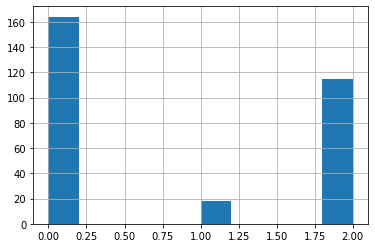

In [28]:
# 0 = normal; 1 = fixed defect; 2 = reversable detect
print(sorted(df1['thal'].unique()))
df1['thal'].hist()

**Standartization(Z-Score)**

In [29]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [30]:
#age, trestbps, chol, thalach

In [31]:
# Normalisasi
scaling = StandardScaler()

for col in ["age","sex","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]:df1[col] = scaling.fit_transform(df1[col].values.reshape(-1,1))
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,1.600302,0.691095,0,1.596266,-0.257179,2.430427,1.010199,-0.812095,-0.696419,-0.820813,0.643781,0.344824,-0.874292,0
1,1.600302,-1.446980,0,0.468418,-0.160859,-0.411450,-1.003419,0.061157,-0.696419,0.639470,-0.976583,1.411625,-0.874292,0
2,1.268242,-1.446980,0,1.032342,-0.411292,-0.411450,-1.003419,-1.554358,-0.696419,1.326662,2.264145,-0.721976,-0.874292,0
3,1.157555,0.691095,0,0.355633,0.667499,2.430427,1.010199,1.065396,-0.696419,0.295874,0.643781,0.344824,-0.874292,1
4,1.046868,0.691095,0,-1.223355,-0.700254,-0.411450,1.010199,-0.244481,1.435916,0.639470,0.643781,-0.721976,-0.874292,0


**Split Data**

In [32]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [33]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.05,random_state=0)

In [34]:
len(X_test)

15

# **KKN**

In [35]:
k_range = range(1,len(X_test)+1)
scores = {}
scores_list = []
for k in k_range:
  kkn = KNeighborsClassifier(n_neighbors=k)
  kkn.fit(X_train,y_train)
  y_pred = kkn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))

Text(0, 0.5, 'testing accuracy')

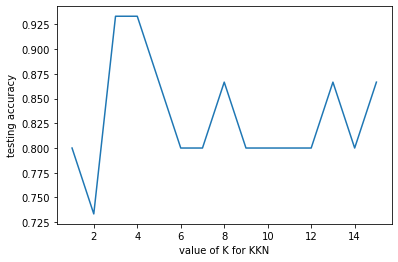

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_range,scores_list)
plt.xlabel('value of K for KKN')
plt.ylabel('testing accuracy')

In [37]:
kkn = KNeighborsClassifier(n_neighbors=3)
kkn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_prediksi=kkn.predict(X_test)

print("Y asli       = ",y_test.values)
print("Y prediksi   = ",y_prediksi)

Y asli       =  [0 0 1 1 0 1 1 1 1 1 0 0 1 1 0]
Y prediksi   =  [0 0 0 1 0 1 1 1 1 1 0 0 1 1 0]


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, y_prediksi).ravel()
tn, fp, fn, tp

(6, 0, 1, 8)

In [40]:
akurasi = (tp + tn) / (tp + fp + tn + fn)
er = (fp + fn) / (tp + fp + tn + fn)
recall = tp / (fp + tn)
specificity = tn / (fp + tn)
precision = tp / (tp + fp)
fscore = (2 * precision * recall) / (precision + recall)

print("Akurasi     =",round(akurasi,3))
print("Error rate  =",round(er,3))
print("Recall      =",round(recall,3))
print("Specificity =",round(specificity,3))
print("Precision   =",round(precision,3))
print("F-Score     =",round(fscore,3))


Akurasi     = 0.933
Error rate  = 0.067
Recall      = 1.333
Specificity = 1.0
Precision   = 1.0
F-Score     = 1.143
